# Assignment 2 Part 2: Moview Review Intent Application
## Alessandro Allegranzi

In [50]:
# Imports
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# constants
NUM_WORDS = 10000

In [51]:
# Loading IMDB review data set.
# Available here: https://keras.io/api/datasets/imdb/

imdb_data = tf.keras.datasets.imdb # data set known to Keras/TensorFlow
# Setting up tensorts for training and testing.
(x_train, y_train), (x_test, y_test) = imdb_data.load_data(num_words = NUM_WORDS)
# load_data() takes several arguments, but starting with mostly defaults. The num_words
# params limits the size of the word intent dictionary. Lowering it to 10k from the
# standard amount to manage size of the dictionary.

# converting everything to np arrays.
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_train = np.array(y_train)

In [52]:
# Taking a look at the data. The load_data() method for the dataset
# returns "lists of sequences, which are lists of indexes (integers)". Each
# integer maps to a word in the review.

print(x_train[0])
print(y_train[0])
print(x_test[0])
print(y_test[0])

# Keras provides an example of how to decode the word from the integer as below
# using the mapping dictionary from the dataset. Doing this to see a sample
# review.
start_char = 1
oov_char = 2
index_from = 3
word_index = tf.keras.datasets.imdb.get_word_index()
# Reverse the word index to obtain a dict mapping indices to words
# And add `index_from` to indices to sync with `x_train`
inverted_word_index = dict(
    (i + index_from, word) for (word, i) in word_index.items()
)
# Update `inverted_word_index` to include `start_char` and `oov_char`
inverted_word_index[start_char] = "[START]"
inverted_word_index[oov_char] = "[OOV]"
# Decode the first sequence in the dataset
decoded_sequence = " ".join(inverted_word_index[i] for i in x_train[0])

print(decoded_sequence)

# Pad the sequences to the same length
x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train, maxlen=250)
x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test, maxlen=250)

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
1
[1, 591, 202, 14, 31, 6, 717, 10, 10, 2, 2, 5, 4, 360, 7, 

In [54]:
# Clearing model.
tf.keras.backend.clear_session()
# Define the neural net model
model = tf.keras.models.Sequential([
  tf.keras.layers.Embedding(NUM_WORDS, 2, input_length=250),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(250, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# Print summary of the model.
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 250, 2)            20000     
                                                                 
 flatten (Flatten)           (None, 500)               0         
                                                                 
 dense (Dense)               (None, 250)               125250    
                                                                 
 dense_1 (Dense)             (None, 1)                 251       
                                                                 
Total params: 145501 (568.36 KB)
Trainable params: 145501 (568.36 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [55]:
# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
fit = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=3, batch_size=120, verbose=2)

Epoch 1/3
209/209 - 5s - loss: 0.5303 - accuracy: 0.7072 - val_loss: 0.3109 - val_accuracy: 0.8672 - 5s/epoch - 22ms/step
Epoch 2/3
209/209 - 2s - loss: 0.2366 - accuracy: 0.9080 - val_loss: 0.2915 - val_accuracy: 0.8784 - 2s/epoch - 10ms/step
Epoch 3/3
209/209 - 2s - loss: 0.1665 - accuracy: 0.9389 - val_loss: 0.3154 - val_accuracy: 0.8746 - 2s/epoch - 9ms/step


In [56]:
# Evaluate the model
scores = model.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 87.46%


In [57]:
# Visualize the accuracies over time to see if we have overfit the model.

def plot_accuracy(history, miny=None):
  acc = history.history['accuracy']
  test_acc = history.history['val_accuracy']
  epochs = range(len(acc))
  plt.plot(epochs, acc)
  plt.plot(epochs, test_acc)
  if miny:
    plt.ylim(miny, 1.0)
  plt.title('accuracy')
  plt.xlabel('epoch')
  plt.figure()

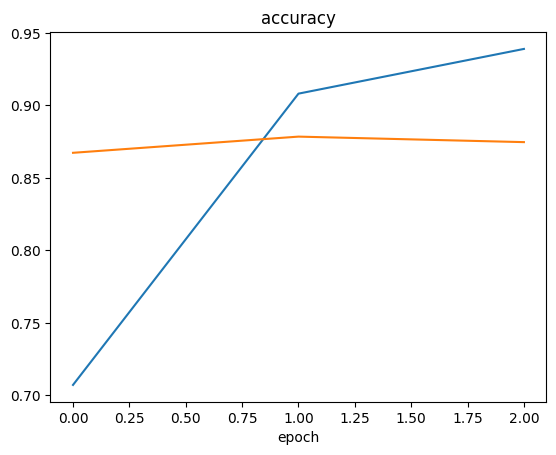

<Figure size 640x480 with 0 Axes>

In [58]:
plot_accuracy(fit)

In [59]:
# Making some predictions to see sample output.

def encode_review(review):
  #encodes review based on dataset dictionary.
    words = review.split()
    encoded = [start_char]

    for word in words:
        # Check if the word is in the word_index
        if word in word_index:
            encoded.append(word_index[word] + index_from)
        else:
            encoded.append(oov_char)

    return encoded

# Sample reviews. Going for a positive, medium, and negative sentiment review.
sample_reviews = ["This movie was excellent. I've never loved a movie so much",
                  "The movie was ok. I've seen better, but it was mostly fun.",
                  "I didn't like this movie at all. Terrible film."]

# Encode the reviews
encoded_reviews = [encode_review(review) for review in sample_reviews]

# Pad the sequences and print an exampe to see what an encoded review looks like.
encoded_reviews = tf.keras.preprocessing.sequence.pad_sequences(encoded_reviews, maxlen=250)
print(encoded_reviews[0], '\n')

# Get predictions
predictions = model.predict(encoded_reviews)

# Print predictions
print(predictions)

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   1   2  20  16   2   2 115 447   

Interestingly, the model does not deal with ambiguity very well. It predicted the positive review very close to 1, and the strictly negative review very close to 0. That is quite good. However, the medium sentiment review was predicted to be much more negative than it actually is.

In [30]:
# Get raw predictions
raw_predictions = model.predict(encoded_reviews)

# Calculate binary predictions and confidence scores
binary_predictions = np.where(raw_predictions > 0.5, 1, 0)
confidence_scores = np.abs(raw_predictions - 0.5) * 2

# Print binary predictions and confidence scores
for i, (pred, conf) in enumerate(zip(binary_predictions, confidence_scores)):
    print(f"Review {i+1}: Prediction = {pred[0]}, Confidence = {conf[0]*100:.2f}%")

1/1 [==============================] - 0s 20ms/step
Review 1: Prediction = 1, Confidence = 53.00%
Review 2: Prediction = 1, Confidence = 25.25%
Review 3: Prediction = 0, Confidence = 16.80%


1/1 [==============================] - 0s 21ms/step


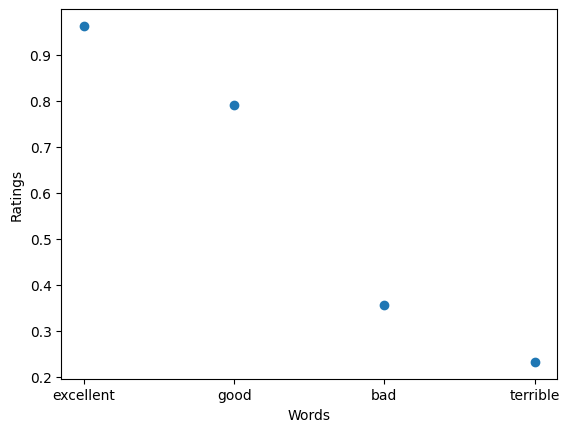

In [31]:
# Scatterplot of some random words to visualize more directly how the model
# rates words.
# Random array of words
words = ["excellent", "good", "bad", "terrible"]

# Encode the words
encoded_words = [encode_review(word) for word in words]

# Pad the sequences
encoded_words = tf.keras.preprocessing.sequence.pad_sequences(encoded_words, maxlen=250)

# Get ratings
ratings = model.predict(encoded_words)

# Plot
plt.scatter(words, ratings)
plt.xlabel('Words')
plt.ylabel('Ratings')
plt.show()